Grafik gespeichert in: analysis/plots_paper


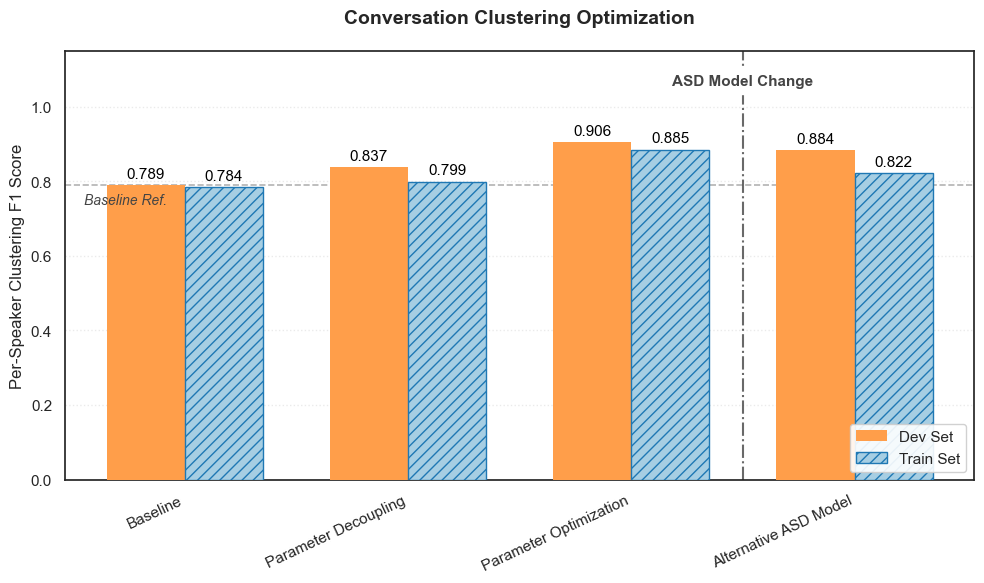

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import os

# --- SETUP ---
PLOT_DIR = "analysis/plots_paper"
os.makedirs(PLOT_DIR, exist_ok=True)

sns.set_theme(style="white")
plt.rcParams.update({'font.size': 12})

# --- DATEN ---
data = {
    "Experiment": [
        "Baseline",              
        "Parameter Decoupling",  
        "Parameter Optimization",
        "Alternative ASD Model"  
    ],
    "Spk_Train":  [0.784, 0.799, 0.885, 0.822],
    "Spk_Dev":    [0.789, 0.837, 0.906, 0.884]
}
df = pd.DataFrame(data)
IDX_BASELINE = 0

# --- FARBEN ---
COL_DEV    = "#ff9e4a"
COL_TRAIN  = "#a6cee3"
COL_BORDER = "#1f78b4"

def plot_paper_graph():
    
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(df))
    width = 0.35
    
    # --- 1. HILFSLINIE BASELINE ---
    baseline_val = df["Spk_Dev"][IDX_BASELINE]
    # Linie im Hintergrund (zorder=0)
    ax.axhline(y=baseline_val, color='gray', linestyle='--', linewidth=1.2, zorder=0, alpha=0.6)
    
    # Beschriftung der Linie (WICHTIG: zorder=4)
    # Damit liegt der Text VOR den Balken (die haben zorder=3)
    ax.text(-0.45, baseline_val - 0.02, "Baseline Ref.", 
            color='#444444', fontsize=10, style='italic', va='top', zorder=4)

    # --- 2. BALKEN ZEICHNEN (zorder=3) ---
    bars_dev = ax.bar(x - width/2, df["Spk_Dev"], width, 
                      color=COL_DEV, edgecolor='none', label='Dev Set', zorder=3)
    
    bars_train = ax.bar(x + width/2, df["Spk_Train"], width, 
                        color=COL_TRAIN, edgecolor=COL_BORDER, hatch='///', 
                        label='Train Set', zorder=3)

    # --- 3. WERTE LABELN (zorder > 3 automatisch) ---
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=11, color='black')
    add_labels(bars_dev)
    add_labels(bars_train)

    # --- 4. TRENNLINIE (ASD Model Change) ---
    separator_x = 2.5 
    ax.axvline(x=separator_x, color='#444444', linestyle='-.', linewidth=1.5, alpha=0.8, zorder=2)
    ax.text(separator_x, 1.05, "ASD Model Change", ha='center', va='bottom', 
            color='#444444', fontsize=11, weight='bold', backgroundcolor='white', zorder=4)

    # --- 5. ACHSEN & LAYOUT ---
    ax.set_title("Conversation Clustering Optimization", fontsize=14, weight='bold', pad=20)
    ax.set_ylabel("Per-Speaker Clustering F1 Score", fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(df["Experiment"], rotation=25, ha='right', fontsize=11)
    ax.set_ylim(0.0, 1.15)
    ax.grid(True, axis='y', linestyle=':', alpha=0.4, zorder=0)
    
    # --- 6. LEGENDE ---
    ax.legend(loc='lower right', frameon=True, fontsize=11, framealpha=0.9, edgecolor='#cccccc')
    
    plt.tight_layout()
    
    # Speichern
    plt.savefig(os.path.join(PLOT_DIR, "paper_clustering_optimization.png"), dpi=300)
    plt.savefig(os.path.join(PLOT_DIR, "paper_clustering_optimization.pdf"), format='pdf')
    print(f"Grafik gespeichert in: {PLOT_DIR}")
    plt.show()

# Ausführen
plot_paper_graph()